# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [9]:
base = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')
base

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [14]:
Qtbase = base.drop(['Unnamed: 0','data_ref','index'], axis=1)
Qtbase = Qtbase.loc[:,Qtbase.columns.isin(['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda','educacao'])]

In [15]:
Qtbase['educacao'].unique()

array(['Secundário', 'Superior completo', 'Superior incompleto',
       'Primário', 'Pós graduação'], dtype=object)

In [16]:
QEd = {'Primário' : 1,
             'Secundário' : 2,
             'Superior completo': 3,
             'Superior incompleto': 4,
             'Pós graduação' : 5}


In [17]:
Qtbase.replace({'educacao':QEd}, inplace=True)

In [18]:
Qtbase

,qtd_filhos,educacao,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,2,36,3.575342,3.0,3369.24
1,0,2,42,0.860274,2.0,6096.14
2,2,3,31,8.065753,4.0,5658.98
3,0,2,50,1.208219,2.0,7246.69
4,0,2,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...
14995,1,2,37,2.046575,3.0,1193.29
14996,1,3,30,12.079452,3.0,2519.18
14997,0,2,40,2.161644,2.0,1586.85
14998,0,3,47,3.295890,2.0,6975.39


In [19]:
Qtbase.dtypes

qtd_filhos                 int64
educacao                   int64
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [20]:
Qtbase.corr()

,qtd_filhos,educacao,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,0.059956,-0.364303,-0.074250,0.896488,0.009567
educacao,0.059956,1.000000,-0.191029,-0.027543,0.040720,0.046555
idade,-0.364303,-0.191029,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,-0.027543,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,0.040720,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.046555,0.042570,0.394235,0.020977,1.000000


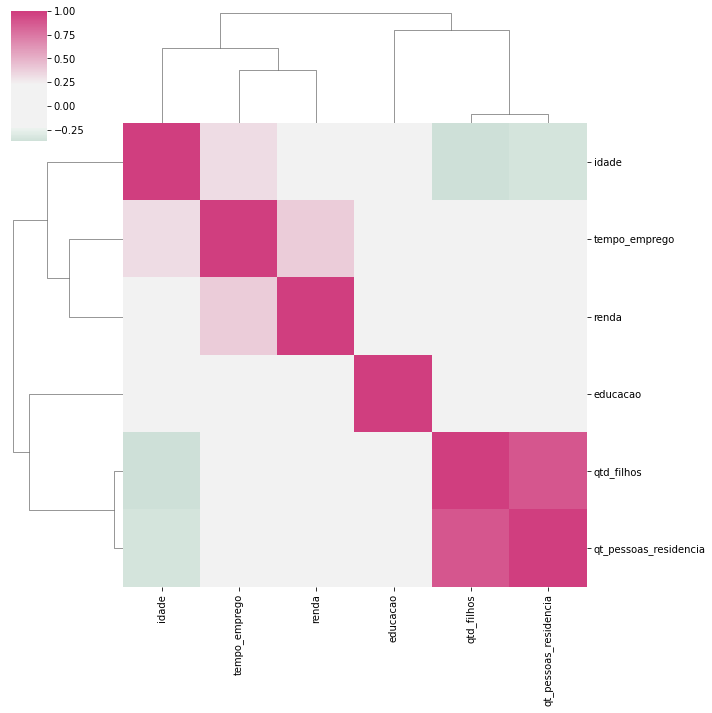

In [22]:
cmap = sns.diverging_palette(h_neg=150,h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap(Qtbase.corr(),figsize=(10,10),center=0,cmap=cmap)

- Quanto menos filhos, e menos pessoas na casa, maior a renda.
- Há uma dispersão quase uniforme entre idade/renda e tempo_emprego/renda, com cada vez menos outliers quando a renda aumenta acima de 30.000.
- A educação avançada parece ter um efeito inversamente proporcional a renda, e as grandes disparidades de renda ocorrem com aqueles que apenas terminaram o segundo grau.
- Parece haver uma leve inclinação para mulheres terem mais tempo de emprego, e por isso mais estabilidade na renda, e consistentemente maiores renda, constituindo a maioria dos outliers.


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='tempo_emprego', ylabel='idade'>

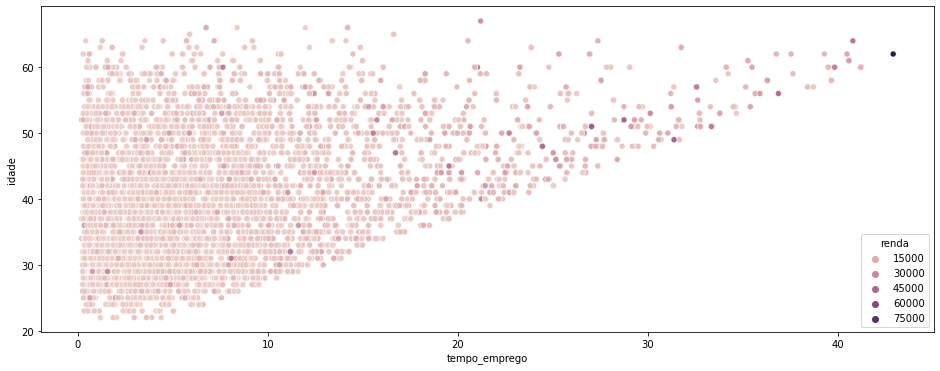

In [23]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='tempo_emprego', y='idade',hue='renda', data = Qtbase)

3) Na sua opinião, há outliers na variável renda?

- Há obviamente um outlier bem distinto do resto, com uma renda em volta de 75000.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [28]:
Qtbaselog = Qtbase.copy()
Qtbaselog['log_renda'] = np.log(Qtbaselog['renda'])

<AxesSubplot:xlabel='tempo_emprego', ylabel='log_renda'>

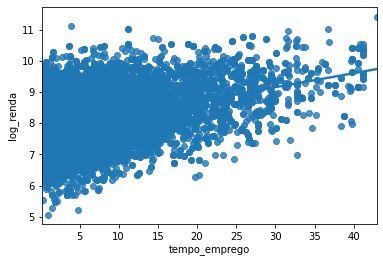

In [31]:
sns.regplot(x='tempo_emprego', y='log_renda', data = Qtbaselog)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

- Parece que o log cria um certo afunilamento dos valores, tornando-os mais lineares, mesmo que ainda um tanto dispersos.

https://github.com/IlsF33/EBAC